In [8]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns

In [9]:
# ea_data = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\filtered_ea_clean.csv")
# ea_data.dropna(inplace=True)
# ea_data.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)

In [10]:
# ea_data.head()

In [11]:
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_merged.csv")
df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea.csv")

In [12]:
df.head()

,nBondsM,ATS4v,ETA_beta_ns,FCSP3,FractionCSP3,AETA_beta_ns,AETA_dBeta,nBondsD,HallKierAlpha,nBondsKD,...,GATS3dv,fr_allylic_oxid,ATS3d,NumSaturatedRings,ATS3se,BCUTZ-1l,nRing,EA_values,solvent_ID,smiles
0,0.0,10144.395645,0.0,1.0,1.0,0.0,-0.576923,0.0,-0.15,0.0,...,1.177361,0.0,198.0,1.0,707.658948,5.798745,1.0,-5.118749,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O
1,0.0,10992.626313,0.0,1.0,1.0,0.0,-0.634615,0.0,-0.08,0.0,...,1.148487,0.0,226.0,2.0,693.302796,5.801000,2.0,-4.129380,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1
2,0.0,5615.581182,0.0,1.0,1.0,0.0,-0.568182,0.0,-0.22,0.0,...,1.304831,0.0,105.0,0.0,487.510508,5.830939,0.0,-4.700916,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F
3,0.0,10987.772785,0.0,1.0,1.0,0.0,-0.571429,0.0,-0.08,0.0,...,1.201315,0.0,182.0,1.0,680.761184,5.815348,1.0,-4.305889,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1
4,0.0,7247.129548,0.0,1.0,1.0,0.0,-0.600000,0.0,-0.08,0.0,...,1.450061,0.0,142.0,1.0,520.873980,5.823649,1.0,-5.431978,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C


In [13]:
df.describe()

,nBondsM,ATS4v,ETA_beta_ns,FCSP3,FractionCSP3,AETA_beta_ns,AETA_dBeta,nBondsD,HallKierAlpha,nBondsKD,...,AATS0p,ZMIC1,GATS3dv,fr_allylic_oxid,ATS3d,NumSaturatedRings,ATS3se,BCUTZ-1l,nRing,EA_values
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,...,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,0.257708,7669.004701,0.365449,0.952437,0.952437,0.035304,-0.549082,0.220845,-0.197221,0.220845,...,1.173412,24.167256,1.179386,0.046917,133.002681,0.614611,492.296748,5.810630,0.616287,-4.816064
std,0.471381,2838.662976,0.731855,0.092445,0.092445,0.075141,0.088763,0.447537,0.190224,0.447537,...,0.064508,4.153663,0.255730,0.231186,40.772609,0.600258,127.352301,0.032546,0.599935,0.708541
min,0.000000,62.167489,0.000000,0.333333,0.333333,0.000000,-0.800000,0.000000,-1.300000,0.000000,...,0.987023,11.160894,0.464115,0.000000,15.000000,0.000000,69.921792,5.667668,0.000000,-6.336051
25%,0.000000,5751.463371,0.000000,1.000000,1.000000,0.000000,-0.604167,0.000000,-0.290000,0.000000,...,1.141118,21.212639,1.000582,0.000000,107.000000,0.000000,414.867493,5.798485,0.000000,-5.458039
50%,0.000000,7969.762621,0.000000,1.000000,1.000000,0.000000,-0.575000,0.000000,-0.120000,0.000000,...,1.174919,24.576219,1.161634,0.000000,136.000000,1.000000,510.599676,5.814716,1.000000,-4.794992
75%,0.000000,9734.346636,0.000000,1.000000,1.000000,0.000000,-0.519231,0.000000,-0.080000,0.000000,...,1.190649,27.134783,1.330913,0.000000,162.000000,1.000000,584.410281,5.830889,1.000000,-4.249113
max,2.000000,16387.507983,4.500000,1.000000,1.000000,0.750000,0.312500,2.000000,0.500000,2.000000,...,1.936009,37.663399,2.384521,2.000000,248.000000,3.000000,812.740124,5.998580,3.000000,-2.431185


In [14]:
# df = df.merge(ea_data, on=['solvent_ID'], how="right")
# df = df[(df["EA_values"] < -3) & (df["EA_values"] > -6)]

In [15]:
df.head()

,nBondsM,ATS4v,ETA_beta_ns,FCSP3,FractionCSP3,AETA_beta_ns,AETA_dBeta,nBondsD,HallKierAlpha,nBondsKD,...,GATS3dv,fr_allylic_oxid,ATS3d,NumSaturatedRings,ATS3se,BCUTZ-1l,nRing,EA_values,solvent_ID,smiles
0,0.0,10144.395645,0.0,1.0,1.0,0.0,-0.576923,0.0,-0.15,0.0,...,1.177361,0.0,198.0,1.0,707.658948,5.798745,1.0,-5.118749,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O
1,0.0,10992.626313,0.0,1.0,1.0,0.0,-0.634615,0.0,-0.08,0.0,...,1.148487,0.0,226.0,2.0,693.302796,5.801000,2.0,-4.129380,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1
2,0.0,5615.581182,0.0,1.0,1.0,0.0,-0.568182,0.0,-0.22,0.0,...,1.304831,0.0,105.0,0.0,487.510508,5.830939,0.0,-4.700916,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F
3,0.0,10987.772785,0.0,1.0,1.0,0.0,-0.571429,0.0,-0.08,0.0,...,1.201315,0.0,182.0,1.0,680.761184,5.815348,1.0,-4.305889,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1
4,0.0,7247.129548,0.0,1.0,1.0,0.0,-0.600000,0.0,-0.08,0.0,...,1.450061,0.0,142.0,1.0,520.873980,5.823649,1.0,-5.431978,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Columns: 103 entries, nBondsM to smiles
dtypes: float64(101), object(2)
memory usage: 2.3+ MB


In [17]:
# df.rename(columns={'smiles_x': 'smiles'}, inplace=True)
# df.drop("smiles_y", inplace=True, axis=1)

In [18]:
len(df["EA_values"])

2984

In [19]:
# for col in df.columns:
#     if df[col] == float or type(df[col]) == int:
#         df[col] = df[col].fillna(df[col].mean())
#     elif type(df[col]) == str:
#         df[col] = df[col].fillna(df[col].mode())

In [20]:
df.isna().sum()

nBondsM         0
ATS4v           0
ETA_beta_ns     0
FCSP3           0
FractionCSP3    0
               ..
BCUTZ-1l        0
nRing           0
EA_values       0
solvent_ID      0
smiles          0
Length: 103, dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
# meta_cols = ['solvent_ID', 'smiles', 'solubility_CO2 [mol/L]', 'viscosity [Pa s]', 'Binding_Energy_eV']
meta_cols = ['solvent_ID', 'smiles']
target = 'EA_values'  # or 'solubility_CO2 [mol/L]', 'viscosity [Pa s]'
X = df.drop(columns=meta_cols + [target])
y = df[target]

<Axes: >

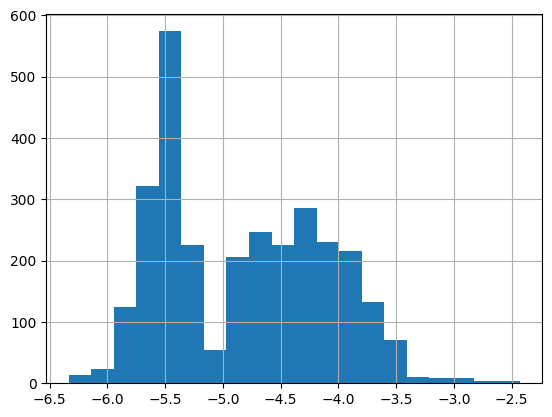

In [23]:
y.hist(bins=20)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [25]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# y_train_trans = qt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [26]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # works with negatives too
y_train_trans = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

<Axes: ylabel='Count'>

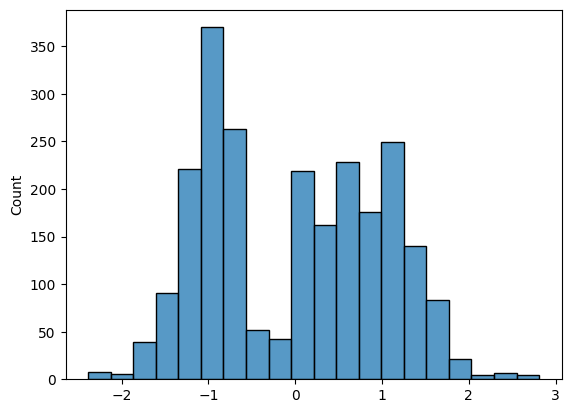

In [27]:
import seaborn as sns
sns.histplot(y_train_trans, bins = 20)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# 4. Model Training
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train_log)

In [30]:
pd.DataFrame(X_train_scaled, columns=X_test.columns).describe()

,nBondsM,ATS4v,ETA_beta_ns,FCSP3,FractionCSP3,AETA_beta_ns,AETA_dBeta,nBondsD,HallKierAlpha,nBondsKD,...,NsssCH,AATS0p,ZMIC1,GATS3dv,fr_allylic_oxid,ATS3d,NumSaturatedRings,ATS3se,BCUTZ-1l,nRing
count,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,...,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03,2.387000e+03
mean,1.488359e-18,-3.036253e-16,3.274390e-17,-6.757151e-16,-6.757151e-16,1.488359e-16,-3.051137e-16,-7.441797e-19,1.488359e-16,-7.441797e-19,...,4.613914e-17,-1.917007e-15,-5.358094e-16,-6.325527e-17,-2.976719e-17,-2.143237e-16,1.235338e-16,3.542295e-16,1.785138e-14,-1.235338e-16
std,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,...,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00,1.000210e+00
min,-5.411341e-01,-2.623757e+00,-4.947854e-01,-6.836137e+00,-6.836137e+00,-4.642864e-01,-2.297707e+00,-4.931604e-01,-5.810055e+00,-4.931604e-01,...,-1.582983e+00,-2.952414e+00,-3.161376e+00,-2.833300e+00,-2.042119e-01,-2.906973e+00,-1.015868e+00,-3.203444e+00,-4.398729e+00,-1.019192e+00
25%,-5.411341e-01,-6.828465e-01,-4.947854e-01,5.122276e-01,5.122276e-01,-4.642864e-01,-6.182446e-01,-4.931604e-01,-4.922464e-01,-4.931604e-01,...,-5.625725e-01,-5.378723e-01,-6.822708e-01,-7.083461e-01,-2.042119e-01,-6.450406e-01,-1.015868e+00,-6.188674e-01,-3.778154e-01,-1.019192e+00
50%,-5.411341e-01,1.075650e-01,-4.947854e-01,5.122276e-01,5.122276e-01,-4.642864e-01,-3.044988e-01,-4.931604e-01,4.028302e-01,-4.931604e-01,...,4.578382e-01,-1.111615e-02,1.000647e-01,-6.312127e-02,-2.042119e-01,9.254595e-02,6.634097e-01,1.469687e-01,1.202929e-01,6.609262e-01
75%,-5.411341e-01,7.230981e-01,-4.947854e-01,5.122276e-01,5.122276e-01,-4.642864e-01,3.599039e-01,-4.931604e-01,6.134365e-01,-4.931604e-01,...,4.578382e-01,3.017160e-01,7.107842e-01,6.058429e-01,-2.042119e-01,6.826152e-01,6.634097e-01,7.175778e-01,6.205062e-01,6.609262e-01
max,3.728906e+00,3.057352e+00,5.761528e+00,5.122276e-01,5.122276e-01,9.740719e+00,9.938377e+00,3.999869e+00,3.667227e+00,3.999869e+00,...,3.519070e+00,1.221324e+01,3.263073e+00,4.792944e+00,8.347609e+00,2.821616e+00,4.021965e+00,2.513730e+00,5.071439e+00,4.021162e+00


In [31]:
X_train_scaled.shape
X_train_scaled[:4]

array([[-5.41134078e-01, -4.49122072e-02, -4.94785447e-01,
         5.12227621e-01,  5.12227621e-01, -4.64286367e-01,
        -1.38398142e-01, -4.93160362e-01,  2.44875523e-01,
        -4.93160362e-01, -1.83262537e-01, -4.22323298e-01,
        -6.95878751e-01, -1.32358491e-01, -4.90759385e-01,
         1.43286571e-01,  4.82899964e-03, -3.56693393e-01,
         2.40775800e-01, -3.69558580e-01,  3.46995371e-01,
        -3.69558580e-01, -1.87418673e-01, -1.01296702e-01,
        -3.69558580e-01, -7.50164185e-02, -3.69558580e-01,
        -1.87418673e-01, -7.53614713e-01, -2.54613112e-01,
        -3.43528933e-01, -7.92234761e-01, -3.28240368e-01,
        -1.86372880e-01,  7.68792446e-02, -3.43298471e-01,
        -3.50075932e-01, -3.28301677e-01, -2.91347472e-01,
        -1.82634674e-01, -3.83156206e-01, -2.54315931e-01,
        -3.16912375e-01, -6.81007699e-01, -3.19341233e-01,
        -1.76619587e-01, -3.16912375e-01, -7.96449744e-01,
        -5.64826881e-01,  3.26143204e-01, -1.76619587e-0

In [32]:
X_train.shape
X_train.values

array([[0.00000000e+00, 7.57462679e+03, 0.00000000e+00, ...,
        5.39783932e+02, 5.80761881e+00, 0.00000000e+00],
       [0.00000000e+00, 7.38648063e+03, 0.00000000e+00, ...,
        4.56744592e+02, 5.84490679e+00, 1.00000000e+00],
       [1.00000000e+00, 8.62125869e+03, 1.00000000e+00, ...,
        5.63170272e+02, 5.73439037e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.10014652e+04, 0.00000000e+00, ...,
        6.20385256e+02, 5.80144049e+00, 1.00000000e+00],
       [0.00000000e+00, 7.74852682e+03, 0.00000000e+00, ...,
        5.72725364e+02, 5.81653451e+00, 0.00000000e+00],
       [1.00000000e+00, 1.10889218e+04, 1.00000000e+00, ...,
        6.28237772e+02, 5.73226143e+00, 0.00000000e+00]],
      shape=(2387, 100))

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# # XGB model with GPU support
from xgboost import XGBRegressor
xgb = XGBRegressor(
    tree_method='gpu_hist',  # key line for GPU
    device='cuda', 
    random_state=42
)

param_dist = {
    'n_estimators': [200, 300, 500, 700],
    'max_depth': [3, 6, 8, 10, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.1, 0.5, 1, 5]
}


# # RandomizedSearchCV with GPU-based XGBoost
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=10,
    verbose=1,
    n_jobs=1  # must be 1 when using GPU with XGBoost
)

# # Train the model
random_search.fit(X_train_scaled, y_train)

# Evaluate best model
best_model = random_search.best_estimator_

# model = XGBRegressor(
#     tree_method='gpu_hist',
#     device='cuda',
#     subsample=0.8,
#     colsample_bytree=0.8,
#     reg_lambda=1,
#     reg_alpha=0.5,
#     learning_rate=0.01,
#     n_estimators=300,
#     max_depth=15,
#     random_state=42
# )

# model.fit(X_train_scaled, y_train_trans)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:2676: UserWarning: [12:46:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:729: UserWarning: [12:46:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to predic

In [34]:
random_search.best_estimator_.score

<bound method RegressorMixin.score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)>

In [35]:
best_params = random_search.best_params_
model = XGBRegressor(
    **best_params,
    tree_method='gpu_hist',
    device='cuda',
    random_state=42
)

In [36]:
model.fit(
    X_train_scaled,
    y_train_trans,
    verbose=True
)

c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:02:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# final_model.get_params

In [38]:

# 5. Evaluation
# y_pred_log = model.predict(X_test_scaled)
# ------------------- Step 5: Predict and Inverse Transform ------------------- #
# y_pred_orig = model.predict(X_test_scaled)
y_pred_trans = model.predict(X_test_scaled)
y_pred_train_trans = model.predict(X_train_scaled)
y_pred_orig = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
y_pred_train = pt.inverse_transform(y_pred_train_trans.reshape(-1, 1)).flatten()
# y_pred_orig = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# Inverse log1p
# y_pred = np.expm1(y_pred_log)
# y_test = np.expm1(y_test)


c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\xgboost\core.py:2676: UserWarning: [14:02:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [39]:

from sklearn.metrics import mean_squared_error, r2_score

# rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
r2 = r2_score(y_test, y_pred_orig)
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.4265
R² Score: 0.6554


In [40]:
feature_names = X.columns.tolist()  # This should match the model's input

c:\Users\nandi\Documents\ML_CO2_ER\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


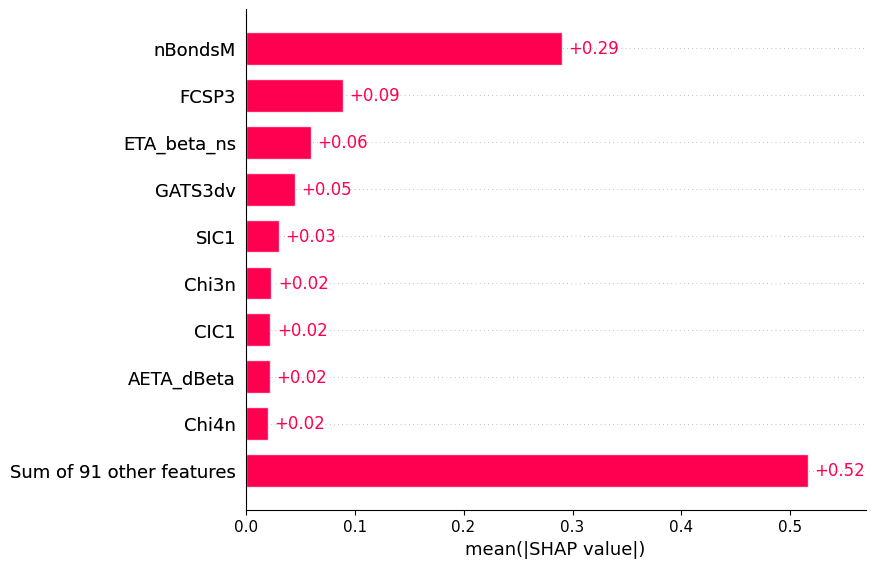

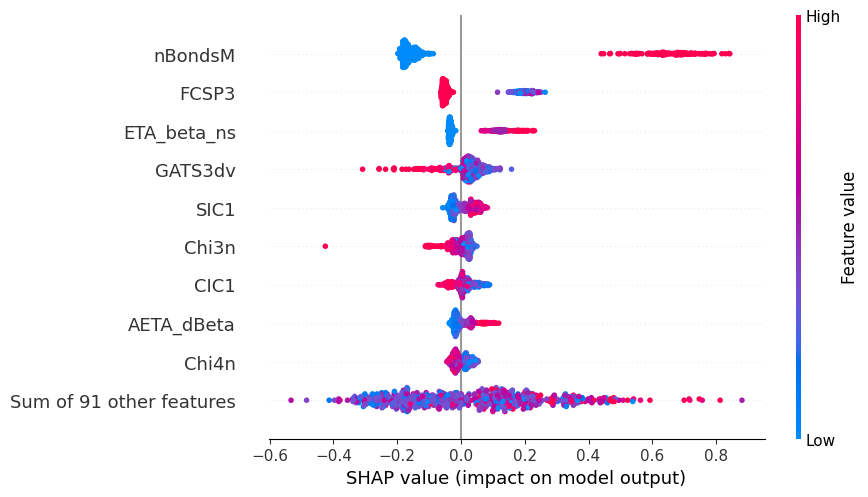

In [41]:
import shap

explainer = shap.Explainer(model, X_test_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=10)

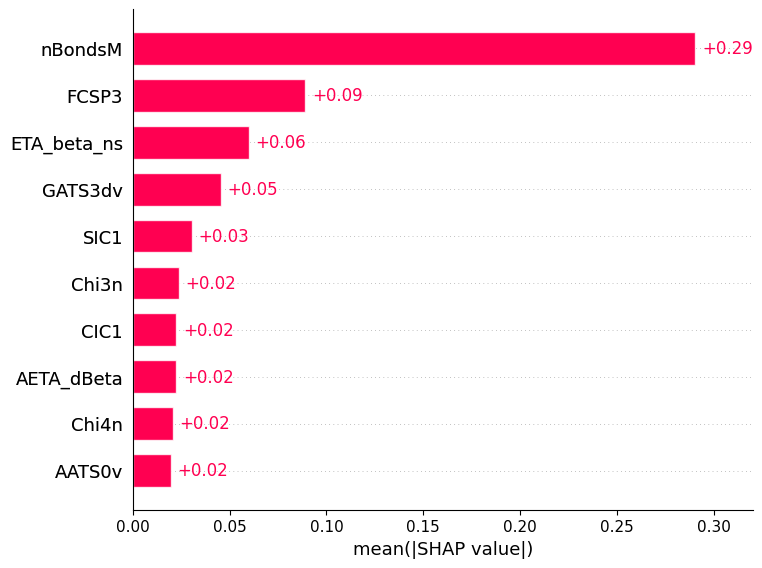

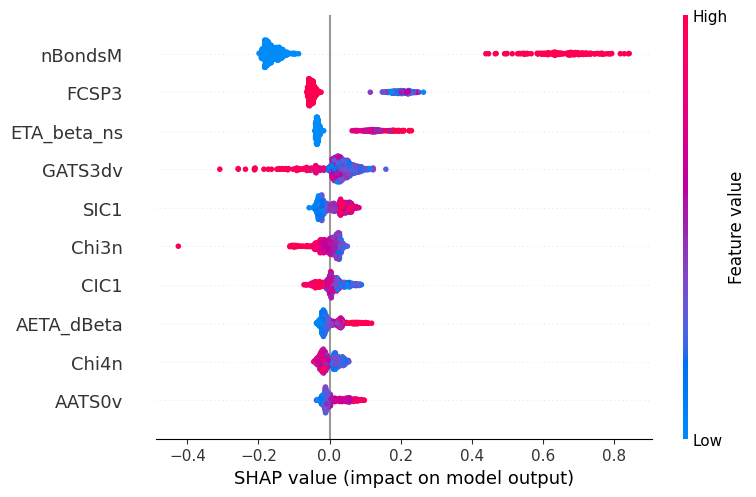

In [42]:
# Compute SHAP values
# explainer = shap.Explainer(model, X_test_scaled, feature_names=X.columns)
# shap_values = explainer(X_test_scaled)

# Get mean absolute SHAP values per feature and sort them
mean_shap = np.abs(shap_values.values).mean(axis=0)
top_10_indices = np.argsort(mean_shap)[-10:][::-1]

# Slice SHAP explanation to include only top 10 features
shap_values_top10 = shap.Explanation(
    values=shap_values.values[:, top_10_indices],
    base_values=shap_values.base_values,
    data=shap_values.data[:, top_10_indices],
    feature_names=np.array(shap_values.feature_names)[top_10_indices].tolist()
)

# Plot only top 10 features
shap.plots.bar(shap_values_top10)
shap.plots.beeswarm(shap_values_top10)

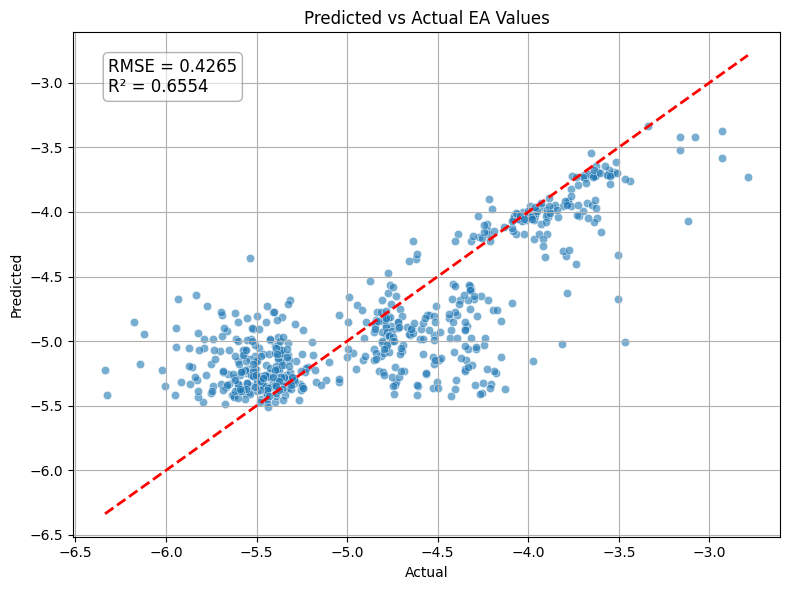

In [43]:
residuals = y_test - y_pred_orig

import matplotlib.pyplot as plt
import seaborn as sns 

# --- A. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_orig, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)

# Annotate RMSE and R² inside the plot
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.4f}\nR² = {r2:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.title("Predicted vs Actual EA Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

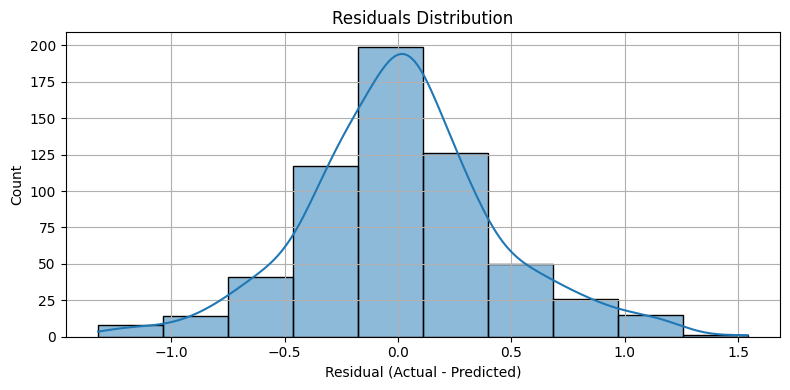

In [44]:
# --- B. Histogram of Residuals ---
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Save the model to a JSON file
model.save_model("xgb_ea_model.json")

C:\Users\nandi\AppData\Local\Temp\ipykernel_23152\388120603.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


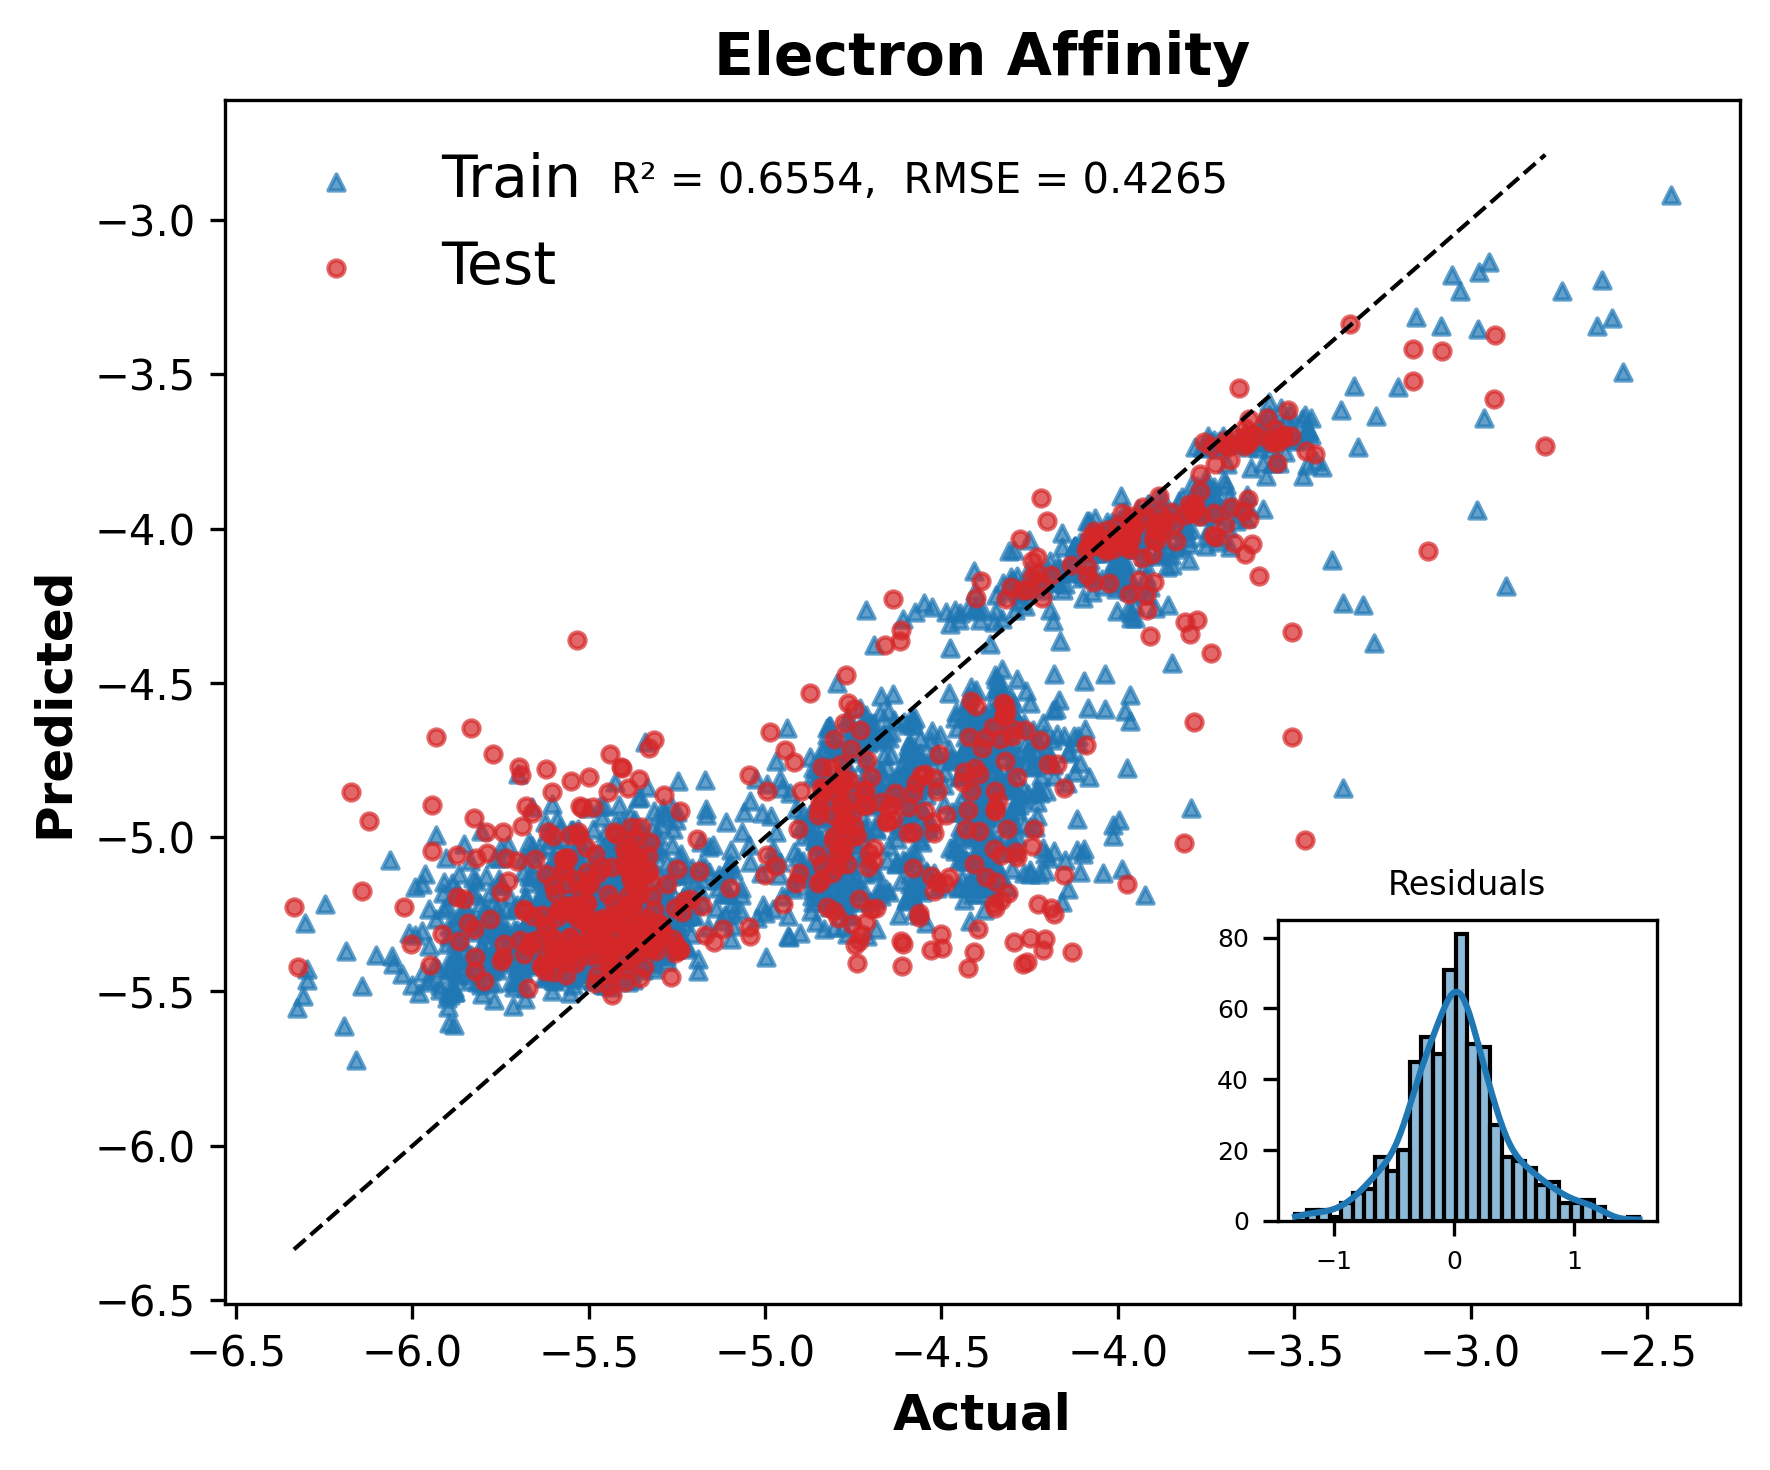

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ➤ Create main plot with better layout engine
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# ➤ Scatter: Train and Test
ax.scatter(y_train, y_pred_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
ax.scatter(y_test, y_pred_orig, alpha=0.7, s=15, color='tab:red', marker='o', label='Test')

# ➤ Diagonal reference line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)

# ➤ Title and axes labels
ax.set_title("Electron Affinity", fontsize=14, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize=12, fontweight='bold')
ax.tick_params(axis='both', labelsize=10)

# ➤ Custom legend with performance metrics
# ax.legend(title=f"RMSE = {rmse:.4f}\nR² = {r2:.4f}", loc='upper left', fontsize=10, title_fontsize=10, frameon=False)

x_center = (y_test.min() + y_test.max()) / 2
# y_top = y_pred_orig.max() + (y_pred_orig.max() - y_pred_orig.min()) * 0.15
y_top = ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])
ax.text(x_center, y_top, f"R² = {r2:.4f},  RMSE = {rmse:.4f}",
        fontsize=10, ha='center', va='top')

# ➤ Legend
ax.legend(loc='upper left', fontsize=14, frameon=False)
# ➤ Inset residual plot
inset_ax = inset_axes(ax, width="25%", height="25%", loc='lower right', borderpad=2)
sns.histplot(residuals, bins=30, kde=True, ax=inset_ax)
inset_ax.set_title("Residuals", fontsize=8)
inset_ax.set_xlabel("")
inset_ax.set_ylabel("")
inset_ax.tick_params(labelsize=6)

# ➤ Save and display
plt.tight_layout()
plt.savefig("predicted_vs_actual_with_train_test.png", dpi=300, bbox_inches='tight')
plt.show()
